In [1]:
NAME = "Juliana Yakimchuk"
COLLABORATORS = ""

### Titanic Data Analysis 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import random
random.seed(42)

#data prep
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#models
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


#performance
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, recall_score,roc_curve, classification_report



In [3]:
raw_data = pd.read_csv('train.csv')
raw_data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#check if column names have weird symbols - all good
print(raw_data.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [5]:
#reset index for better readability
raw_data =   raw_data.set_index(['PassengerId'])
raw_data.sort_index()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
raw_data.nunique() 

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [7]:
raw_data.info()
#Based on the output, data types are correctly interpreted, though some categorical variables are considered 
#numerical(e.g. 'Survived' and 'Pclass'). We also have a lot of null values in "Age" and "Cabin". 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
raw_data['Survived'].value_counts(normalize = True)
#from what we can see around 60% of Titanic passengers did not survive.

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [9]:
raw_data.groupby('Survived').mean()
#Based on the means, passengers of higher classes (and fares) had better survival rate. 
#Having relatives on board (and their #) only slightly affected survival rate

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


<AxesSubplot:xlabel='Pclass', ylabel='count'>

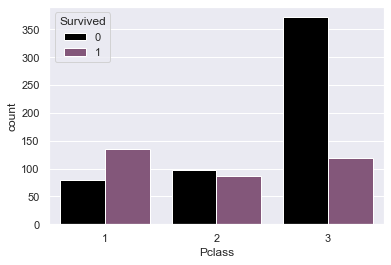

In [10]:
cmap = sns.cubehelix_palette( start=.5, rot=0, dark=4, light=-0.5)
sns.countplot(x = raw_data['Pclass'], hue = raw_data['Survived'], palette = cmap)

#we can see that the lower the class, the slimmer are survival chances. 
#This feature will definitely be important for our analysis

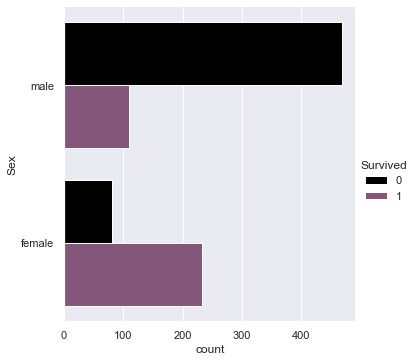

In [11]:
sns.catplot(y='Sex', hue ="Survived", kind = 'count', data = raw_data, palette=cmap)
#As we can see, a much bigger percentage of women survived compared to men.

In [12]:
raw_data.dropna(subset = ['Embarked'],inplace = True)

In [13]:
'''
We should decide which columns we'd like to keep for our analysis.
1. The "Name" column doesn't convey any additional information. In most cases, any relations will be duplicated 
in "SibSp" or "Parch" colummns. They would be a better measure of relationship, as people may share the same 
last name without being related, or adult siblings might have different last names.
2. The "Fare" column values will undoubtedy depend on "Pclass". Again, no need to keep duplicated information.
3. The "Ticket" column will most likely correlate to "Parch" and "SibSp" columns. 
Let's run a few checks to confirm if it's OK to remove this column.
'''
raw_data['Ticket'].nunique()

680

In [14]:
tick_dup = raw_data[raw_data.duplicated(['Ticket'])]
dup_count = tick_dup[(tick_dup['SibSp'] ==0) & (tick_dup['Parch']==0)].agg('count')
dup_count['TotalPassengers'] = raw_data['Ticket'].count()
dup_count['PerTotal'] = dup_count['Ticket']*100/dup_count['TotalPassengers']
dup_count

#As we can see, the # of duplicate tickets that do not belong to family members is only about 5%,
#we can remove this column

Survived            43.000000
Pclass              43.000000
Name                43.000000
Sex                 43.000000
Age                 33.000000
SibSp               43.000000
Parch               43.000000
Ticket              43.000000
Fare                43.000000
Cabin               14.000000
Embarked            43.000000
TotalPassengers    889.000000
PerTotal             4.836895
dtype: float64

In [15]:
raw_data.drop(['Fare','Ticket','Cabin','Name'],axis = 1,inplace=True)
raw_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,S
2,1,1,female,38.0,1,0,C
3,1,3,female,26.0,0,0,S
4,1,1,female,35.0,1,0,S
5,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,S
888,1,1,female,19.0,0,0,S
889,0,3,female,NaN,1,2,S


<AxesSubplot:ylabel='Frequency'>

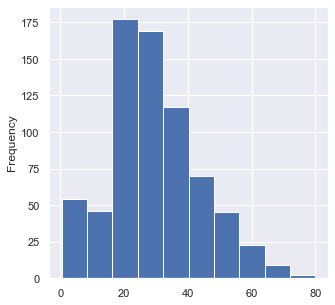

In [16]:
#Before we drop any more columns, let's first fill the missing values in the age column. 
#We will do group imputation. In order to decide if we'll use mean or median, we should plot the data
#plt.cm.get_cmap(name='Accent', lut=None)
plt.style.use('seaborn-deep')
#plt.cm.register_cmap(cmap=s)
raw_data['Age'].plot(kind = 'hist', figsize = (5,5))

#Based on the histogram, we can see that the data is skewed to the right, it is best to use "median" to fill N/A

In [17]:
'''we decided to use the following groups for imputation:
1. 'Sex' - at the beginning of the 20th century, it would have been unlikely for a woman to travel alone. 
She would likely travel with an accompanying male,it will be safe to assume that in many cases it would be a 
father or a spouse. In both cases the male would likely be older (for spouses this is historically the case, 
and obviously for fathers this is biologically the case).
2. 'Pclass' - passengers in higher classes tend to be older due to accumulation of wealth over their lifetime.
3. 'Survived' - supposedly children evacuated first (we are about to find out).
'''
raw_data.groupby(['Sex','Pclass','Survived']).agg("median")

#Per the below summary, the selected categories indeed reflect a difference in mean, so we believe 
#it is the right choice

Age  SibSp  Parch
Sex    Pclass Survived                    
female 1      0         25.0    1.0    2.0
              1         35.0    0.0    0.0
       2      0         32.5    0.5    0.0
              1         28.0    0.0    0.0
       3      0         22.0    1.0    1.0
              1         19.0    0.0    0.0
male   1      0         45.5    0.0    0.0
              1         36.0    0.0    0.0
       2      0         30.5    0.0    0.0
              1          3.0    0.0    1.0
       3      0         25.0    0.0    0.0
              1         25.0    0.0    0.0

In [18]:
raw_data['Age'].fillna(raw_data.groupby(['Sex','Pclass','Survived'])['Age'].transform('median'),inplace = True)
raw_data.isnull().sum()*100/raw_data.isnull().count()

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Embarked    0.0
dtype: float64

In [19]:
#Checking feature importance with Random Forests
rf_clf = RandomForestClassifier()

In [20]:
y = raw_data.Survived
X = pd.get_dummies(raw_data.drop (['Survived'], axis = 1),drop_first = 'True')

In [21]:
rf_clf.fit(X,y)
rf_clf_scores = cross_val_score(rf_clf, X,y, cv = 5)
rf_clf_scores

array([0.73595506, 0.80898876, 0.84831461, 0.83146067, 0.81920904])

In [22]:
feats = rf_clf.feature_importances_
feat_names = X.columns.to_list()

In [23]:
importances = zip(feats,feat_names)
sorted(list(importances))

[(0.012754422933080004, 'Embarked_Q'),
 (0.029262158784613825, 'Embarked_S'),
 (0.05012701708815798, 'Parch'),
 (0.07488361731729204, 'SibSp'),
 (0.13455567482455968, 'Pclass'),
 (0.28903874762528475, 'Sex_male'),
 (0.4093783614270116, 'Age')]

In [24]:
#we will check our numeric categories' p-values (as their correlation with the dependent variable) to decide if 
#we should keep them.
x_with_num = raw_data[['SibSp','Parch','Age']]
y = raw_data.iloc[:,0]
sel_num = SelectKBest(k='all')
sel_num.fit(x_with_num, y)
x_train_fs = sel_num.transform(x_with_num)

features = x_with_num.columns
pvalues = dict(zip(features, sel_num.pvalues_))
scores = dict(zip(features,sel_num.scores_))  

print(pvalues)
print(scores)

#based on the output, 'SibSp' p-value is too high and score is low, we will remove it. 
#'Parch' p-value is on the higher side, but within the 0.05 cutoff. We'll keep it for now and remove it at a later 
#time if required.

{'SibSp': 0.31067537341133067, 'Parch': 0.013136766201093403, 'Age': 0.011605785766085635}
{'SibSp': 1.0289782858207495, 'Parch': 6.1754623279069, 'Age': 6.396662692273349}


In [25]:
'''
We'll check categorical data to see if there is a correlation with our target. As we are comparing categorical 
features with categorical output, it is appropriate to use chi-squared test.
First, we'll convert our categorical data to dummy variables.
'''
x_with_categ = pd.get_dummies(raw_data.drop(['Survived','Age','SibSp','Parch'],axis = 1), drop_first = 'True')
x_with_categ
y = raw_data.iloc[:,0]

sel_categ = SelectKBest(score_func=chi2, k='all')
sel_categ.fit(x_with_categ,y)
x_train_fs = sel_categ.transform(x_with_categ)

features = x_with_categ.columns
pvalues = dict(zip(features, sel_categ.pvalues_))
scores = dict(zip(features,sel_categ.scores_))   

print(pvalues)
print(scores)

{'Pclass': 4.029368274214839e-08, 'Sex_male': 1.1080339840333552e-21, 'Embarked_Q': 0.8971611206152695, 'Embarked_S': 0.0175163338584307}
{'Pclass': 30.13526610569773, 'Sex_male': 91.51403687480048, 'Embarked_Q': 0.016705142066762147, 'Embarked_S': 5.643886757601594}


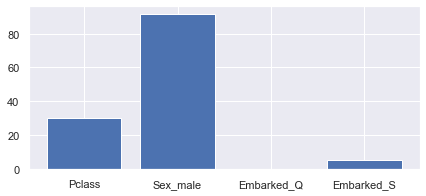

In [26]:
#Looking at the p-values of different categories, we can see that 'Embarked_Q' has a p-value of >0.05. 'Embarked_S',
#though wihin the 0.05 cutoff, still has a comparatively high p-value. 
plt.rcParams["figure.figsize"] = (7,3)
plt.bar([i for i in scores.keys()],[i for i in scores.values()])
plt.show()

#We also plotted scores for all variables. Based on the graphs, the category "Embarked" overall, has no significant
#score compared to other features, even though "Embarked-C" had a good p-value. We'll investigate this category 
#further to decide whether we want to remove it. 

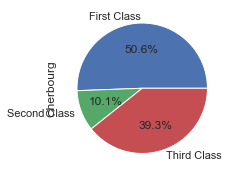

In [27]:
port = raw_data[raw_data['Embarked'] == 'C']
labels = ['First Class', 'Second Class', 'Third Class']
pie = port.groupby('Pclass')['Embarked'].count()
pie.plot.pie(autopct="%.1f%%",  labels = labels)
plt.ylabel('Cherbourg')
plt.show()
#Based on this, a disproportionate # of passengers, who embarked at Cherbourg, had first-class tickets, 
#and as we established, first class had much higher survival rates.
#"Embarked_C" strongly correlates with "PClass" and it's best to remove this feature. Both statistical methods
# and Random Forest gave us very similar feature importance picture.

In [28]:
raw_data.drop(['SibSp','Embarked'],axis = 1,inplace=True)
raw_data

,Survived,Pclass,Sex,Age,Parch
PassengerId,,,,,
1,0,3,male,22.0,0
2,1,1,female,38.0,0
3,1,3,female,26.0,0
4,1,1,female,35.0,0
5,0,3,male,35.0,0
...,...,...,...,...,...
887,0,2,male,27.0,0
888,1,1,female,19.0,0
889,0,3,female,22.0,2


In [29]:
data_preprocessed = raw_data

In [30]:
y = data_preprocessed['Survived']
X = data_preprocessed.drop('Survived', axis = 1)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, stratify = y)

In [31]:
num_feat = ['Age', 'Parch']
cat_feat = ['Pclass', 'Sex']

In [32]:
ct = ColumnTransformer(
[('num', StandardScaler(), num_feat),
 ('cat', OneHotEncoder(), cat_feat)
])
ct.fit(X_train)

ColumnTransformer(transformers=[('num', StandardScaler(), ['Age', 'Parch']),
                                ('cat', OneHotEncoder(), ['Pclass', 'Sex'])])

In [33]:
X_train_transf = ct.transform(X_train)
X_test_transf = ct.transform(X_test)

In [34]:
log_reg = LogisticRegression()
log_reg.fit(X_train_transf,y_train)

LogisticRegression()

In [35]:
log_reg_score = cross_val_score(log_reg, X_train_transf,y_train,cv= 3)
log_reg_score

array([0.83653846, 0.79710145, 0.77294686])

In [36]:
#Our model has significance We will now try to predict outcomes on our test set.

y_pred=(log_reg.predict(X_test_transf)>0.5).astype(int)

print(classification_report(y_pred,y_test, digits = 2))

#From the result we can see that the model is slightly biased, and predicts the major class ("died") 
#better than the minor class "survived". But overall accuracy is about 78%, which is 
#an acceptable result given our limited sample size.

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       182
           1       0.63      0.75      0.68        85

    accuracy                           0.78       267
   macro avg       0.75      0.77      0.76       267
weighted avg       0.79      0.78      0.78       267



In [37]:
knn = KNeighborsClassifier(n_neighbors = 15, weights = 'distance')
knn.fit(X_train_transf,y_train)

knn_scores = cross_val_score(knn, X_train_transf, y_train, cv=3)
knn_scores

array([0.81730769, 0.84057971, 0.7826087 ])

In [38]:
y_pred_knn = knn.predict(X_test_transf)
print(classification_report(y_pred_knn,y_test, digits = 2))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       187
           1       0.65      0.82      0.73        80

    accuracy                           0.81       267
   macro avg       0.78      0.82      0.79       267
weighted avg       0.83      0.81      0.82       267



Text(39.5, 0.5, 'Predicted Output')

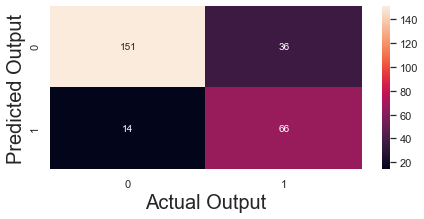

In [39]:
cm= confusion_matrix(y_pred_knn, y_test)
ax=sns.heatmap(cm, annot=True, fmt="0", annot_kws={"size":10})
plt.xlabel('Actual Output', fontsize=20)
plt.ylabel('Predicted Output', fontsize=20)

In [47]:
rf_clf = RandomForestClassifier(class_weight = 'balanced')
rf_clf.fit(X_train_transf,y_train)

rf_scores = cross_val_score(rf_clf, X_train_transf, y_train, cv=3)
rf_scores

array([0.82211538, 0.83091787, 0.78743961])

In [48]:
y_pred_rf = rf_clf.predict(X_test_transf)
print(classification_report(y_pred_rf,y_test, digits = 2))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       176
           1       0.69      0.77      0.73        91

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.81      0.80      0.80       267



Text(39.5, 0.5, 'Predicted Output')

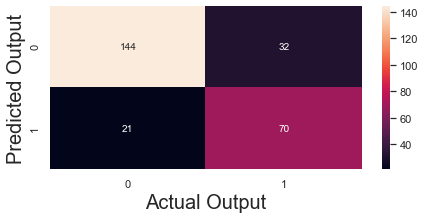

In [49]:
cm= confusion_matrix(y_pred_rf, y_test)
ax=sns.heatmap(cm, annot=True, fmt="0", annot_kws={"size":10})
plt.xlabel('Actual Output', fontsize=20)
plt.ylabel('Predicted Output', fontsize=20)